# Homework 03 - Python introduction

### Exercise 1 - Terminology

Describe the following terms with your own words:

***Function:*** 

***Variable:***

***Calling a function:***

***String:***

In [ ]:
#Function: a function uses some input you give to it and returns a value/list etc.

#Variable: a variable is an input to a function or can be defined by a function (i.e. output variable)

#Calling a function: using an already defined function with a certain input variable

#String: Zeichenabfolge, text or numbers which are read as text
    

### Exercise 2 - spurious correlations

Reproduce a *spurious correlations* plot using `plt.plot()`.

Plot the time series `sociology_doctorates` and `space_launches` on a relative scale, i.e. as percentage of the last data point (i.e. years on the x-axis, relative data on the y-axis, the last data point in both time series should be 100%). Add a second plot which displays the relation between both data sets as scatter plot by using `plt.plot(dataset1, dataset2, 'o')` (data set 1 on x-axis, data set 2 on y-axis absolute units, not percentage).

Instead using the given time series, you can also use any other spurious correlation, if you want to search a different dataset.

Analyze both plots, come up with a wrong conclusion and explain why it is wrong.

Don't forget to label the axis!

![Spurious correlations](spurious-correlations.svg)

Source: https://www.tylervigen.com/spurious-correlations

In [1]:
sociology_doctorates = [601, 579, 572, 617, 566, 547, 597, 580, 536, 579, 576, 601, 664]
space_launches = [54, 46, 42, 50, 43, 41, 46, 39, 37, 45, 45, 41, 54]
years = list(range(1997, 2009 + 1))

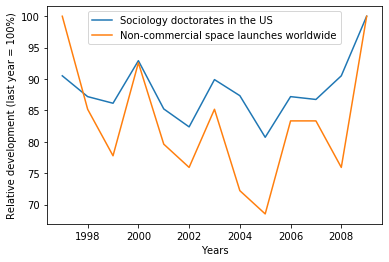

In [20]:
#relative plot: last point = 100%
#function to produce relative list
def rel(l):    
    l1 = [i/l[-1] for i in l]
    l1 = [i*100 for i in l1]
    return l1

rel_soc_doc = rel(sociology_doctorates)
#rel_soc_doc = [i/sociology_doctorates[-1] for i in sociology_doctorates] #alternative
rel_space_l = rel(space_launches)

import math
import matplotlib.pyplot as plt 

## plot with both relative data
plt.plot(years,rel_soc_doc, label = "Sociology doctorates in the US")
plt.plot(years,rel_space_l, label= "Non-commercial space launches worldwide")

plt.xlabel('Years')
plt.ylabel('Relative development (last year = 100%)')
plt.legend()

Text(0.5, 1.0, 'Spurious correlation plot')

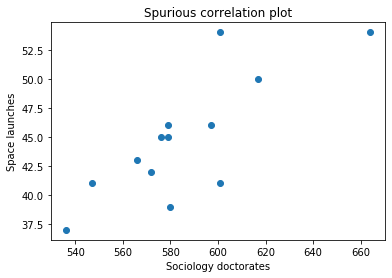

In [17]:
##Scatter plot

plt.plot(sociology_doctorates,space_launches,"o")

plt.xlabel('Sociology doctorates')
plt.ylabel('Space launches')

plt.title('Spurious correlation plot')

#### Wrong Conclusion

The higher the number of sociology doctorates in the US, the more non-commercial space launches worldwide


### Exercise 3 - Flatten the curve

Use the logistic growth model to plot an oversimplified version of the [#flattenthecurve](https://www.biospace.com/getasset/fc2b8ad6-697f-49d5-827e-50f4901baf53/) [graphs](https://evilspeculator.com/wp-content/uploads/2020/03/flattenthecurve.jpg).

Write a function `new_infections(t, k)` which returns the number of new infections given by the following formula:

$i_{\textrm{new}}(t):=\frac{e^\left(-k \cdot P \cdot t\right) \cdot k \cdot P^2 \cdot \left(-1 + \frac{P}{i_0}\right)}{\left(1 + e^\left(-k \cdot P \cdot t \right) \cdot \left(-1 + \frac{P}{i_0}\right) \right)^2}$

Plot the number of infections for $t=0,\ldots,250$, $P=1\,000\,000$, $i_0=1$ and $k= \frac{3}{P \cdot 10}$.

Also add a horizontal line and label it with "healthcare system capacity".

Then analyze the plot for different values of $k$ and explain in detail why one should not use this model/plot to predict the outcome of an epidemic.

Bonus question: Is there something one can still learn from it?

##### Motivation

The motivation is not important for the programming task. There is no need to understand all details in order to do the exercise.

For a fixed population with $P$ individuals, $i(t)$ is the number of infections at time $t$. We assume that every individual stays infectious once infected. 

Choosing a random pair of individuals from the population, a new infection will take place with probability $2 \cdot \frac{i(t)}{P} \cdot \frac{P - i(t)}{P}$. If we assume that every infected individual will meet approximately $c$ others in every time step (and infect them if they are not yet infected), there is a total number of contacts $\frac{c \cdot P}{2}$ in every time step. That means we expect a total number of new infections:

$i_{\textrm{new}}(t) = \frac{c \cdot P}{2} \cdot 2 \cdot \frac{i(t)}{P} \cdot \frac{P - i(t)}{P} = \underbrace{\frac{c}{P}}_{=:k} \cdot \left(i(t) \cdot \left(P - i(t)\right) \right)$

This leads to the differential equation:

$i'(t) = i_{\textrm{new}}(t) = k \cdot \left(i(t) \cdot \left(P - i(t)\right) \right)$

A solution is given by:

$i(t) = \frac{P}{\left(1 + e^\left(-k \cdot P \cdot t \right) \cdot \left(\frac{P}{i_0} - 1\right)\right)}$

Differentiating $i(t)$ gives the number of new infections:

$i_{\textrm{new}}(t):=i'(t) = \frac{e^\left(-k \cdot P \cdot t\right) \cdot k \cdot P^2 \cdot \left(-1 + \frac{P}{i_0}\right)}{\left(1 + e^\left(-k \cdot P \cdot t \right) \cdot \left(-1 + \frac{P}{i_0}\right) \right)^2}$


[3blue1brown](https://www.youtube.com/watch?v=gxAaO2rsdIs) has a great video on the topic. If you are interested in a model which is a bit closer to the real world, but still quite simple, have a look at the [SIR model](https://www.youtube.com/watch?v=Qrp40ck3WpI). A large part of this is inspired by the [German Wikipiedia page](https://de.wikipedia.org/wiki/Logistische_Funktion).

##### Solution

Write your code here:

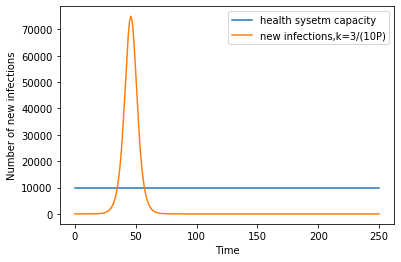

In [46]:
###
import math

def new_infections(t,k,P,i0):
    f=[]
    for t1 in range(0,len(t)):
        i_new = (math.exp(-k*P*t[t1])*k*(P**2)*(-1+P/i0)) / (1+math.exp(-k*P*t[t1])*(-1+P/i0))**2
        f.append(i_new)
    return f

time=list(range(0,251))
Pop=1000000
k= 3/(P*10)
inf=new_infections(time,k,Pop,1)    

cap=[10000]*len(time)
plt.plot(t,cap,label="health sysetm capacity")
plt.xlabel("Time")
plt.ylabel("Number of new infections")

plt.plot(t,inf,label="new infections,k=3/(10P)")

plt.legend()

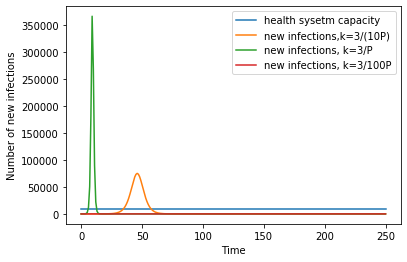

In [45]:
cap=[10000]*len(time)
plt.plot(time,cap,label="health sysetm capacity")
plt.xlabel("Time")
plt.ylabel("Number of new infections")

plt.plot(t,inf,label="new infections,k=3/(10P)")

k=3/(2*P)
inf2=new_infections(time,k,Pop,1)    
plt.plot(t,inf2,label="new infections, k=3/P")

k=3/(100*P)
inf2=new_infections(time,k,Pop,1)    
plt.plot(t,inf2,label="new infections, k=3/100P")

plt.legend()

##### Bonus: Interactive plot

If you want an interactive widget to control the parameter c, you can use the following code.

**Warning:** After running `%matplotlib notebook` you cannot plot in other cells any longer. Restart the Jupyter kernel and refresh the browser window to disable again.

```Python
%matplotlib notebook
from ipywidgets import interact

line, = plt.plot(x, y)

# write here more plotting code (axis label etc):

def update(c=3.0/10.):
    line.set_ydata([new_infections(t, c  / P) for t in time_range])

interact(update);
```

<IPython.core.display.Javascript object>


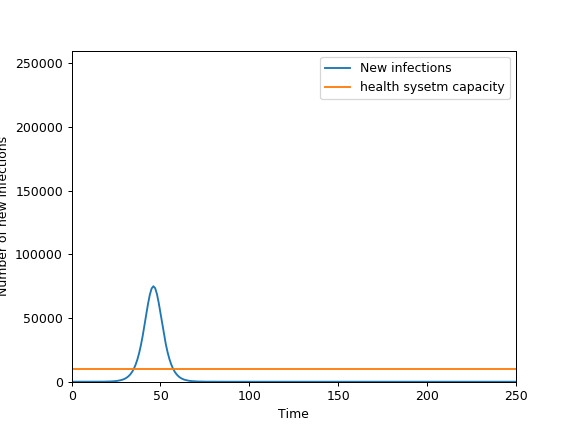

interactive(children=(FloatSlider(value=0.3, description='c', max=1.0), Output()), _dom_classes=('widget-inter…

In [73]:
#Python
%matplotlib notebook
from ipywidgets import interact

#plt.plot(time,cap,"health system capacity")
line, = plt.plot(t, inf, label="New infections")

# write here more plotting code (axis label etc):
plt.xlabel("Time")
plt.ylabel("Number of new infections")
plt.ylim(0,260000)
plt.xlim(0,250)

def update(c=3.0/10.):
    line.set_ydata(new_infections(time, c  / Pop, Pop,1))

interact(update, c=(0.0,1.0));

plt.plot(time,cap,label="health sysetm capacity")
plt.legend()

### Exercise 4 - Fibonacci 

Write a function `fibonacci(n)` which calculates the n-th [Fibonacci number](https://en.wikipedia.org/wiki/Fibonacci_number), defined by $f(0)=0$, $f(1)=1$ and $f(n) = f(n-1)+f(n-2)$.

Use the function to calculate $f(100)$.

In [42]:
##fibonacci

def fibonacci(n):
    f = [0] * (n+1) #create new list
    f[0] = 0
    f[1] = 1
    
    for x in range(2,n+1):
        f[x] = f[x-1] + f[x-2] #calculate fibonacci number for all numbers until the number called is reached (=n)
    
    return f[n]

In [52]:
##fibonacci

def fibonacci(n):
    f = [] #create empty list
    f.append(0)
    f.append(1)
    
    for x in range(2,n+1):
        f.append(f[x-1] + f[x-2])
    
    return f[n]

In [53]:
fibonacci(100)

354224848179261915075